# Database Pipelines and Models

In [2]:
%run ../__init__.py

In [5]:
%matplotlib inline

In [3]:
db_1 = pd.read_pickle('../Datasets/database_1.p')
db_2 = pd.read_pickle('../Datasets/database_2.p')
db_3 = pd.read_pickle('../Datasets/database_3.p')
# top 20 features found 
db_top_20 =  ['feat_257', 'feat_269', 'feat_308', 'feat_315', 'feat_336', 'feat_341', 
                   'feat_395', 'feat_504', 'feat_526', 'feat_639', 'feat_681', 'feat_701', 
                   'feat_724', 'feat_736', 'feat_769', 'feat_808', 'feat_829', 'feat_867',
                   'feat_920', 'feat_956']

#create X and y dataframes from samplesets 
db_y_1 = db_1['target']
db_x_1 = db_1[db_top_20]
db_y_2 = db_2['target']
db_x_2 = db_2[db_top_20]
db_y_3 = db_3['target']
db_x_3 = db_3[db_top_20]

In [22]:
# #correlation matrix
# corrmat = Uci_X_1.corr()
# f, ax = plt.subplots(figsize=(15, 10))
# sns.heatmap(corrmat, vmax=.8, square=True, annot=True);

# Pipelines and Params for SelectKBest

In [4]:
def pipe_gs_skb(X, y, pipeline, params):
    
    X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=.2, 
                                                    random_state=42)

    gs = GridSearchCV(pipeline, param_grid=params, cv=5, return_train_score=True)
    
    gs.fit(X_train, y_train)
    
    results = {'best_params': gs.best_params_,
               'best_score': gs.best_score_,
               'train_score': gs.score(X_train, y_train),
               'test_score': gs.score(X_test, y_test),
               'estimator': gs.best_estimator_.named_steps['clf'],
               }
    
    return results

In [5]:
all_pipe_gs = [(knc_pipeline, knc_params), (lr_pipeline, lr_params), \
               (tree_pipeline, tree_params), (forest_pipeline, forest_params),\
               (svc_pipeline, svc_params)]

def all_pipes_scores_skb(X, y):
    results = []
    
    for pipeline, params in tqdm(all_pipe_gs):
        results.append(pipe_gs_skb(X, y, pipeline, params))
    
    results_df = pd.DataFrame(results)
    return results_df

In [6]:
db_1_skb = all_pipes_scores_skb(db_x_1, db_y_1)
db_2_skb = all_pipes_scores_skb(db_x_2, db_y_2)
db_3_skb = all_pipes_scores_skb(db_x_3, db_y_3)

100%|██████████| 5/5 [03:12<00:00, 38.56s/it]


In [7]:
db_1_skb

,best_params,best_score,estimator,test_score,train_score
0,"{'clf__n_neighbors': 5, 'feature_selection__k'...",0.796811,"KNeighborsClassifier(algorithm='auto', leaf_si...",0.810677,0.867878
1,"{'clf__C': 0.001, 'clf__penalty': 'l2', 'featu...",0.611667,"LogisticRegression(C=0.001, class_weight=None,...",0.605042,0.613027
2,"{'clf__max_depth': 50, 'clf__min_samples_leaf'...",0.720554,"DecisionTreeClassifier(class_weight=None, crit...",0.726644,0.903844
3,"{'clf__max_features': 'auto', 'clf__n_estimato...",0.796317,"(DecisionTreeClassifier(class_weight=None, cri...",0.794859,1.000000
4,"{'clf__C': 100, 'feature_selection__k': 10}",0.787542,"SVC(C=100, cache_size=200, class_weight=None, ...",0.805240,0.822642


In [8]:
db_2_skb

,best_params,best_score,estimator,test_score,train_score
0,"{'clf__n_neighbors': 5, 'feature_selection__k'...",0.778144,"KNeighborsClassifier(algorithm='auto', leaf_si...",0.808686,0.857595
1,"{'clf__C': 0.1, 'clf__penalty': 'l2', 'feature...",0.600412,"LogisticRegression(C=0.10000000000000001, clas...",0.604178,0.599725
2,"{'clf__max_depth': 20, 'clf__min_samples_leaf'...",0.715189,"DecisionTreeClassifier(class_weight=None, crit...",0.735569,0.806186
3,"{'clf__max_features': 'auto', 'clf__n_estimato...",0.786392,"(DecisionTreeClassifier(class_weight=None, cri...",0.807037,1.000000
4,"{'clf__C': 100, 'feature_selection__k': 10}",0.777732,"SVC(C=100, cache_size=200, class_weight=None, ...",0.797141,0.820756


In [9]:
db_3_skb

,best_params,best_score,estimator,test_score,train_score
0,"{'clf__n_neighbors': 5, 'feature_selection__k'...",0.798187,"KNeighborsClassifier(algorithm='auto', leaf_si...",0.794058,0.871963
1,"{'clf__C': 1e-05, 'clf__penalty': 'l2', 'featu...",0.616266,"LogisticRegression(C=1.0000000000000001e-05, c...",0.592649,0.616518
2,"{'clf__max_depth': 50, 'clf__min_samples_leaf'...",0.725545,"DecisionTreeClassifier(class_weight=None, crit...",0.724572,0.904822
3,"{'clf__max_features': 'auto', 'clf__n_estimato...",0.806748,"(DecisionTreeClassifier(class_weight=None, cri...",0.812689,1.000000
4,"{'clf__C': 100, 'feature_selection__k': 10}",0.801586,"SVC(C=100, cache_size=200, class_weight=None, ...",0.796576,0.833942


In [10]:
db_skb_scores = pd.concat([db_1_skb, db_2_skb, db_3_skb], ignore_index=True)
db_skb_scores.sort_values('test_score', ascending=False)
db_skb_scores.to_pickle('../Datasets/db_skb_results.p')

# Pipelines and Params for SFM

In [11]:
# list of pipelines with Select from model

knc_sfm_pipeline = Pipeline([('sfm', SelectFromModel(RidgeClassifier())),
                        ('clf', KNeighborsClassifier())])

lr_sfm_pipeline = Pipeline([('scaler', StandardScaler()),
                        ('sfm', SelectFromModel(RidgeClassifier())),
                        ('clf', LogisticRegression())])

tree_sfm_pipeline = Pipeline([('sfm', SelectFromModel(RidgeClassifier())),
                          ('clf', DecisionTreeClassifier())])

forest_sfm_pipeline = Pipeline([('scaler', StandardScaler()),
                            ('sfm', SelectFromModel(RidgeClassifier())),
                            ('clf', RandomForestClassifier())])

svc_sfm_pipeline = Pipeline([('scaler', StandardScaler()),
                     ('sfm', SelectFromModel(RidgeClassifier())),
                     ('clf', SVC())])

# list of params
knc_sfm_params = {'sfm__estimator':[RidgeClassifier(alpha=a) for a in [1,10,100]],
              'clf__n_neighbors': range(1,20)}

lr_sfm_params = {'sfm__estimator':[RidgeClassifier(alpha=a) for a in [1,10,100]],
             'clf__C':np.logspace(-5,5,6),
             'clf__penalty':['l2','l1']}

tree_sfm_params = {'sfm__estimator':[RidgeClassifier(alpha=a) for a in np.logspace(-1,1,4)],
               'clf__max_depth': [5, 10, 20],
               'clf__min_samples_split': [5, 10, 20]}


forest_sfm_params = {'sfm__estimator':[RidgeClassifier(alpha=a) for a in np.logspace(-1,1,4)],
                 'clf__n_estimators':[10, 50],
                 'clf__max_features':['auto','log2','sqrt']}

svc_sfm_params = {'sfm__estimator':[RidgeClassifier(alpha=a) for a in np.logspace(-1,3,4)],
              'clf__C': [.1, 1, 10, 100]}


In [12]:
def pipe_gs_sfm(X, y, pipeline, params):
    
    X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=.2, 
                                                    random_state=42)

    gs = GridSearchCV(pipeline, param_grid=params, cv=5, return_train_score=True)
    
    gs.fit(X_train, y_train)
    
    results = {'best_params': gs.best_params_,
               'best_score': gs.best_score_,
               'train_score': gs.score(X_train, y_train),
               'test_score': gs.score(X_test, y_test),
               'estimator': gs.best_estimator_.named_steps['clf'],
               }
    
    return results

In [13]:
all_pipe_gs_sfm = [(knc_sfm_pipeline, knc_sfm_params), (lr_sfm_pipeline, lr_sfm_params), \
               (tree_sfm_pipeline, tree_sfm_params), (forest_sfm_pipeline, forest_sfm_params),
               (svc_sfm_pipeline, svc_sfm_params)]

def all_pipes_scores_sfm(X, y):
    results = []
    
    for pipeline, params in tqdm(all_pipe_gs_sfm):
        results.append(pipe_gs_sfm(X, y, pipeline, params))
    
    results_df = pd.DataFrame(results)
    return results_df

In [14]:
db_sfm_1 = all_pipes_scores_sfm(db_x_1, db_y_1)
db_sfm_2 = all_pipes_scores_sfm(db_x_2, db_y_2)
db_sfm_3 = all_pipes_scores_sfm(db_x_3, db_y_3)

100%|██████████| 5/5 [05:37<00:00, 67.45s/it]


In [15]:
db_sfm_1

,best_params,best_score,estimator,test_score,train_score
0,"{'clf__n_neighbors': 7, 'sfm__estimator': Ridg...",0.802002,"KNeighborsClassifier(algorithm='auto', leaf_si...",0.814632,0.853912
1,"{'clf__C': 1e-05, 'clf__penalty': 'l2', 'sfm__...",0.610926,"LogisticRegression(C=1.0000000000000001e-05, c...",0.606031,0.614263
2,"{'clf__max_depth': 10, 'clf__min_samples_split...",0.726486,"DecisionTreeClassifier(class_weight=None, crit...",0.717252,0.822766
3,"{'clf__max_features': 'auto', 'clf__n_estimato...",0.803980,"(DecisionTreeClassifier(class_weight=None, cri...",0.802274,0.999753
4,"{'clf__C': 100, 'sfm__estimator': RidgeClassif...",0.791868,"SVC(C=100, cache_size=200, class_weight=None, ...",0.800791,0.830429


In [16]:
db_sfm_2

,best_params,best_score,estimator,test_score,train_score
0,"{'clf__n_neighbors': 9, 'sfm__estimator': Ridg...",0.792715,"KNeighborsClassifier(algorithm='auto', leaf_si...",0.816383,0.849072
1,"{'clf__C': 1e-05, 'clf__penalty': 'l2', 'sfm__...",0.598900,"LogisticRegression(C=1.0000000000000001e-05, c...",0.601429,0.599588
2,"{'clf__max_depth': 10, 'clf__min_samples_split...",0.714639,"DecisionTreeClassifier(class_weight=None, crit...",0.733920,0.834639
3,"{'clf__max_features': 'log2', 'clf__n_estimato...",0.788454,"(DecisionTreeClassifier(class_weight=None, cri...",0.792194,0.999863
4,"{'clf__C': 100, 'sfm__estimator': RidgeClassif...",0.781856,"SVC(C=100, cache_size=200, class_weight=None, ...",0.802639,0.821993


In [17]:
db_sfm_3

,best_params,best_score,estimator,test_score,train_score
0,"{'clf__n_neighbors': 9, 'sfm__estimator': Ridg...",0.806748,"KNeighborsClassifier(algorithm='auto', leaf_si...",0.813696,0.855722
1,"{'clf__C': 1e-05, 'clf__penalty': 'l2', 'sfm__...",0.612993,"LogisticRegression(C=1.0000000000000001e-05, c...",0.591138,0.612741
2,"{'clf__max_depth': 10, 'clf__min_samples_split...",0.741156,"DecisionTreeClassifier(class_weight=None, crit...",0.737160,0.836963
3,"{'clf__max_features': 'sqrt', 'clf__n_estimato...",0.814302,"(DecisionTreeClassifier(class_weight=None, cri...",0.811178,0.999874
4,"{'clf__C': 100, 'sfm__estimator': RidgeClassif...",0.806119,"SVC(C=100, cache_size=200, class_weight=None, ...",0.800604,0.840614


In [18]:
db_sfm_scores = pd.concat([db_sfm_1, db_sfm_2, db_sfm_3], ignore_index=True)
db_sfm_scores.to_pickle('../Datasets/db_sfm_results.p')

# Pipelines and Params for PCA

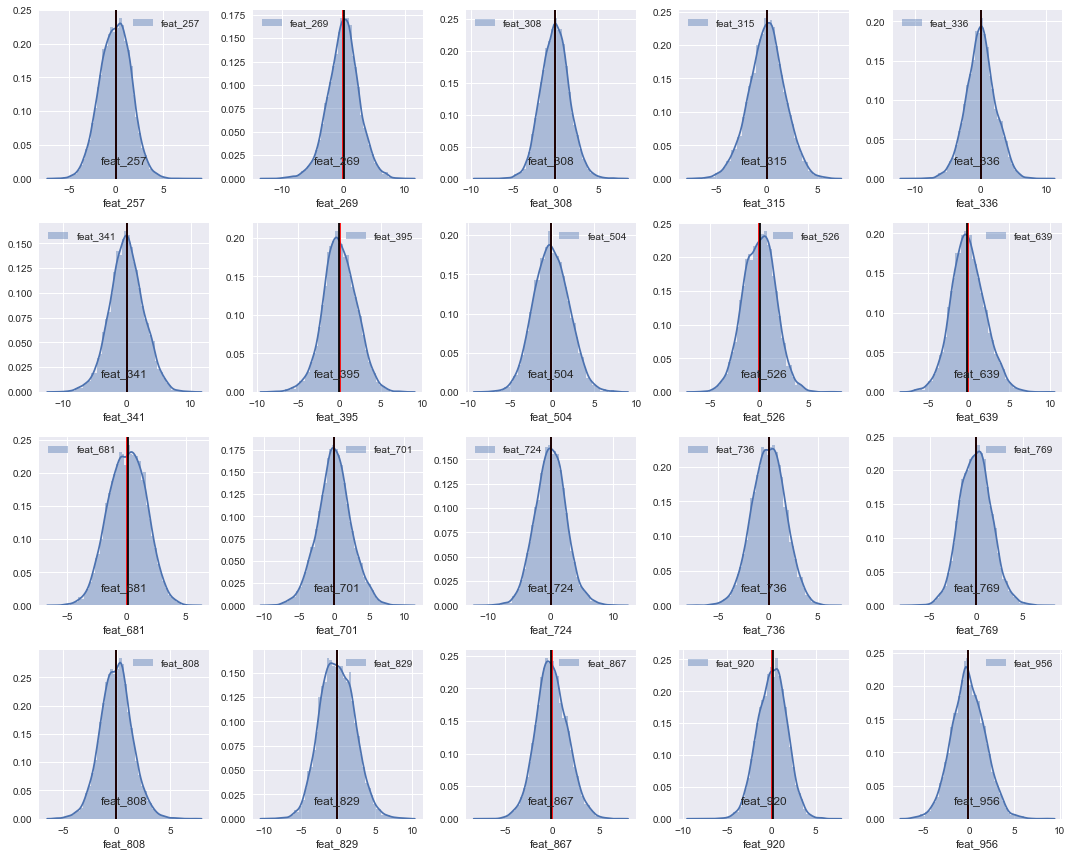

In [6]:
fig = plt.figure(figsize=(15,12))
for i, col in enumerate(db_x_1.columns):
    fig.add_subplot(4,5,i+1)
    sns.distplot(db_x_1[col], label=[col])
    plt.axvline(db_x_1[col].mean(), c='red')
    plt.axvline(db_x_1[col].median(), c='black')
    plt.legend()
    plt.title(col, y=0.05)
plt.tight_layout()

**Data is not skewed so do not need to deskew the data**

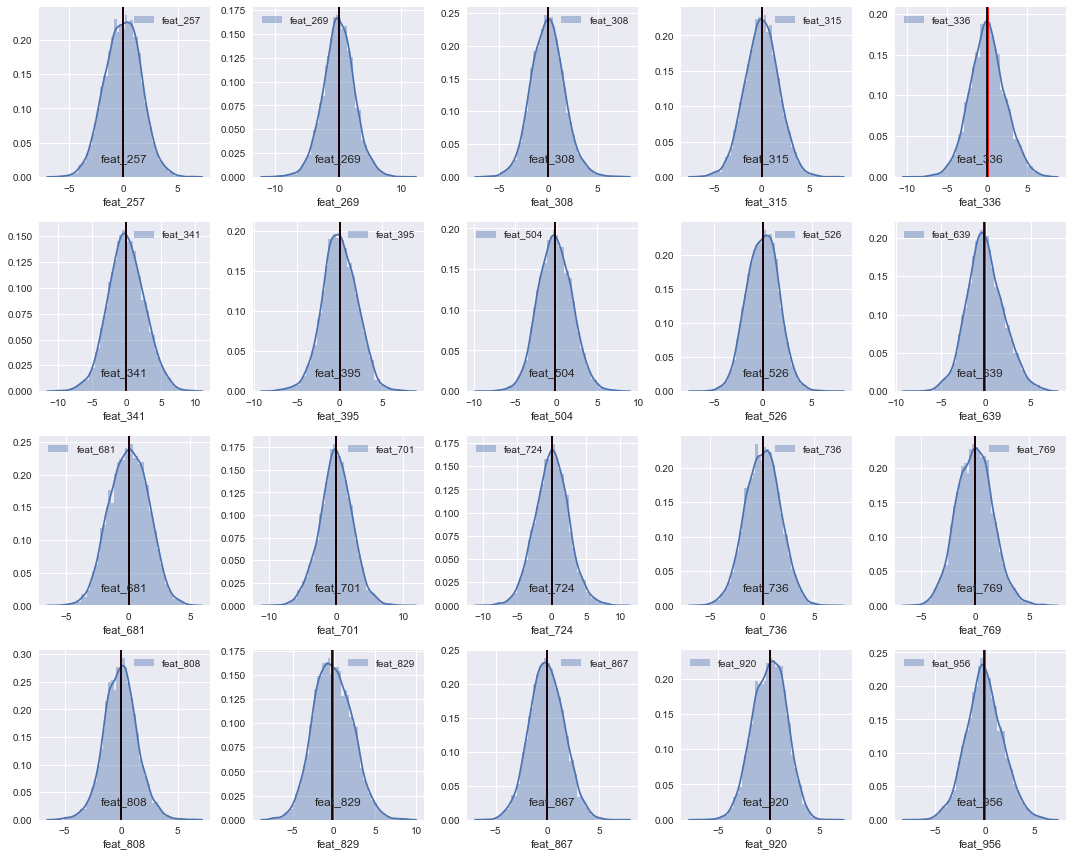

In [7]:
fig = plt.figure(figsize=(15,12))
for i, col in enumerate(db_x_2.columns):
    fig.add_subplot(4,5,i+1)
    sns.distplot(db_x_2[col], label=[col])
    plt.axvline(db_x_2[col].mean(), c='red')
    plt.axvline(db_x_2[col].median(), c='black')
    plt.legend()
    plt.title(col, y=0.05)
plt.tight_layout()

In [1]:
plt.savefig('fig1.png')

NameError: name 'plt' is not defined

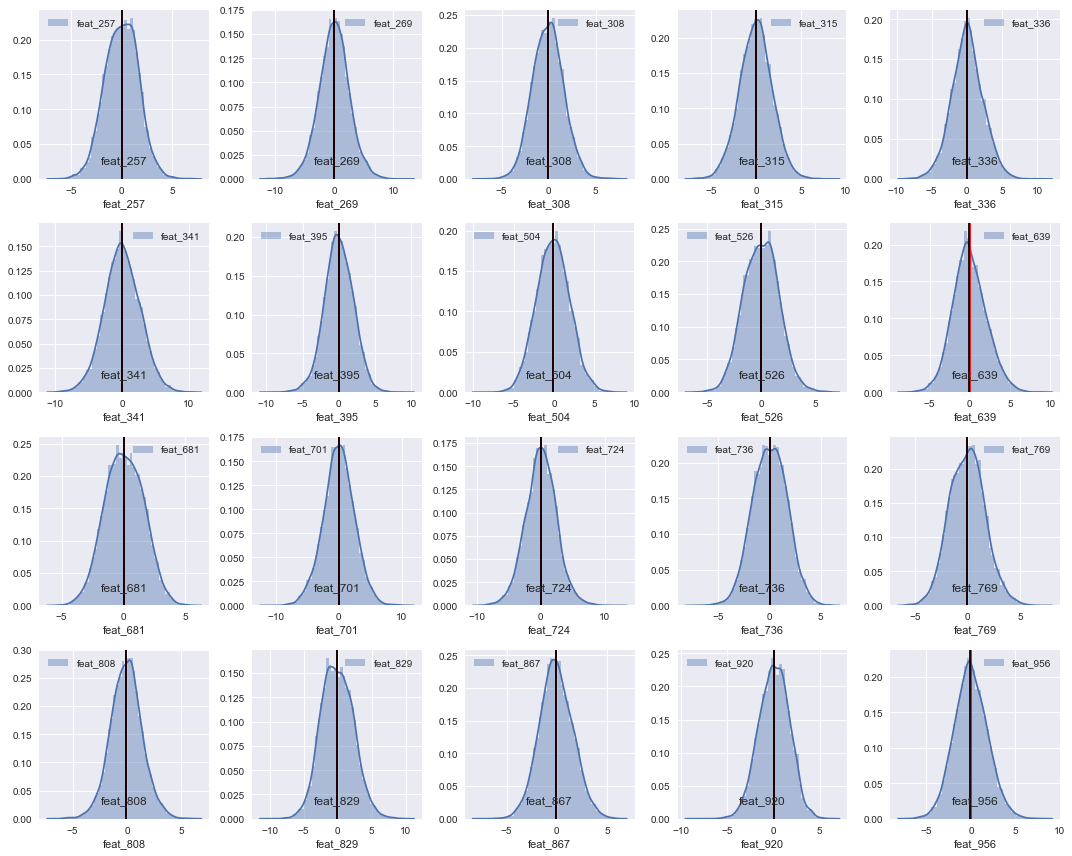

In [8]:
fig = plt.figure(figsize=(15,12))
for i, col in enumerate(db_x_3.columns):
    fig.add_subplot(4,5,i+1)
    sns.distplot(db_x_3[col], label=[col])
    plt.axvline(db_x_3[col].mean(), c='red')
    plt.axvline(db_x_3[col].median(), c='black')
    plt.legend()
    plt.title(col, y=0.05)
plt.tight_layout()

In [19]:
# list of pipelines

knc_pca_pipe = Pipeline([('pca', PCA()),
                         ('clf', KNeighborsClassifier())])

lr_pca_pipe = Pipeline([('scaler', StandardScaler()),
                        ('pca', PCA()),
                        ('clf', LogisticRegression(random_state=42))])

tree_pca_pipe = Pipeline([('pca', PCA()),
                          ('clf', DecisionTreeClassifier(random_state=42))])

forest_pca_pipe = Pipeline([('scaler', StandardScaler()),
                            ('pca', PCA()),
                            ('clf', RandomForestClassifier(random_state=42))])

svc_pca_pipe = Pipeline([('scaler', StandardScaler()),
                         ('pca', PCA()),
                         ('clf', SVC())])

# list of params
knc_pca_params = {'pca__n_components': [3, 5],
    'clf__n_neighbors': range(3,20)}

lr_pca_params = {'pca__n_components': [3, 5],
                 'clf__C':np.logspace(-5,5,6),
             'clf__penalty':['l2','l1']}

tree_pca_params = {'pca__n_components': [3, 5],
                   'clf__max_depth': [5, 10, 20, 50],
               'clf__min_samples_split': [5, 10, 20, 50],
               'clf__min_samples_leaf':[5, 10, 20,]}


forest_pca_params = {'pca__n_components': [3, 5],
                     'clf__n_estimators':[10,50,100, 200],
                 'clf__max_features':['auto','log2','sqrt']}

svc_pca_params = {'pca__n_components': [3, 5],
                  'clf__C': [.1, 1, 10, 100]}


In [20]:
def pipe_gs_pca(X, y, pipeline, params):
    
    X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=.2, 
                                                    random_state=42)

    gs = GridSearchCV(pipeline, param_grid=params, cv=5, return_train_score=True)
    
    gs.fit(X_train, y_train)
    
    results = {'best_params': gs.best_params_,
               'best_score': gs.best_score_,
               'train_score': gs.score(X_train, y_train),
               'test_score': gs.score(X_test, y_test),
               'estimator': gs.best_estimator_.named_steps['clf'],
               }
    
    return results

In [21]:
pca_gs = [(knc_pca_pipe, knc_pca_params), (lr_pca_pipe, lr_pca_params),\
          (tree_pca_pipe, tree_pca_params), (forest_pca_pipe, forest_pca_params),\
          (svc_pca_pipe, svc_pca_params)]

def pca_pipes_scores(X, y):
    results_pca = []
    
    for pipeline, params in tqdm(pca_gs):
        results_pca.append(pipe_gs_pca(X, y, pipeline, params))
    
    results_pca = pd.DataFrame(results_pca)
    return results_pca

In [23]:
db_pca_1 = pca_pipes_scores(db_x_1, db_y_1)
db_pca_2 = pca_pipes_scores(db_x_2, db_y_2)
db_pca_3 = pca_pipes_scores(db_x_3, db_y_3)

100%|██████████| 5/5 [04:21<00:00, 52.32s/it]


In [24]:
db_pca_1

,best_params,best_score,estimator,test_score,train_score
0,"{'clf__n_neighbors': 9, 'pca__n_components': 5}",0.801261,"KNeighborsClassifier(algorithm='auto', leaf_si...",0.815620,0.843159
1,"{'clf__C': 1e-05, 'clf__penalty': 'l2', 'pca__...",0.610308,"LogisticRegression(C=1.0000000000000001e-05, c...",0.593178,0.611049
2,"{'clf__max_depth': 10, 'clf__min_samples_leaf'...",0.732542,"DecisionTreeClassifier(class_weight=None, crit...",0.721206,0.820665
3,"{'clf__max_features': 'auto', 'clf__n_estimato...",0.800643,"(DecisionTreeClassifier(class_weight=None, cri...",0.813643,1.000000
4,"{'clf__C': 10, 'pca__n_components': 5}",0.818317,"SVC(C=10, cache_size=200, class_weight=None, c...",0.826990,0.888271


In [25]:
db_pca_2

,best_params,best_score,estimator,test_score,train_score
0,"{'clf__n_neighbors': 7, 'pca__n_components': 5}",0.797113,"KNeighborsClassifier(algorithm='auto', leaf_si...",0.814733,0.855945
1,"{'clf__C': 0.001, 'clf__penalty': 'l2', 'pca__...",0.597663,"LogisticRegression(C=0.001, class_weight=None,...",0.599780,0.596838
2,"{'clf__max_depth': 10, 'clf__min_samples_leaf'...",0.725498,"DecisionTreeClassifier(class_weight=None, crit...",0.737218,0.806323
3,"{'clf__max_features': 'auto', 'clf__n_estimato...",0.796701,"(DecisionTreeClassifier(class_weight=None, cri...",0.810335,1.000000
4,"{'clf__C': 10, 'pca__n_components': 5}",0.810172,"SVC(C=10, cache_size=200, class_weight=None, c...",0.827927,0.888935


In [26]:
db_pca_3

,best_params,best_score,estimator,test_score,train_score
0,"{'clf__n_neighbors': 16, 'pca__n_components': 5}",0.805363,"KNeighborsClassifier(algorithm='auto', leaf_si...",0.797080,0.835075
1,"{'clf__C': 1e-05, 'clf__penalty': 'l2', 'pca__...",0.614755,"LogisticRegression(C=1.0000000000000001e-05, c...",0.594159,0.616266
2,"{'clf__max_depth': 20, 'clf__min_samples_leaf'...",0.728314,"DecisionTreeClassifier(class_weight=None, crit...",0.738167,0.846154
3,"{'clf__max_features': 'auto', 'clf__n_estimato...",0.807881,"(DecisionTreeClassifier(class_weight=None, cri...",0.809164,1.000000
4,"{'clf__C': 10, 'pca__n_components': 5}",0.816946,"SVC(C=10, cache_size=200, class_weight=None, c...",0.809668,0.890721


In [27]:
db_pca_scores = pd.concat([db_pca_1, db_pca_2, db_pca_3], ignore_index=True)

In [28]:
db_pca_scores.to_pickle('../Datasets/db_pca_results.p')